In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lifestyle-courses-udemy-39k-course/udemy_output_All_Lifestyle_p1_p626.csv


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# LifeStyle Courses - Udemy (39K+ course) EDA

dataset provided by [JIL KOTHARI](https://www.kaggle.com/jilkothari)

## Loading dataset and initial exploration

In [3]:
df = pd.read_csv('../input/lifestyle-courses-udemy-39k-course/udemy_output_All_Lifestyle_p1_p626.csv')
rows, cols = df.shape
print(f"This dataset has {rows} rows and {cols} columns")

This dataset has 39689 rows and 20 columns


In [4]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,793796,Microsoft Excel - Excel from Beginner to Advanced,/course/microsoft-excel-2013-from-beginner-to-...,True,555082,4.60192,4.60676,4.60676,172869,False,211,0,2016-03-15T16:43:36Z,2016-03-16T21:31:03Z,490.0,INR,₹490,8640.0,INR,"₹8,640"
1,516446,Microsoft Excel - Advanced Excel Formulas & Fu...,/course/excel-for-analysts/,True,181544,4.65408,4.65580,4.65580,38008,False,105,0,2015-05-31T23:33:41Z,2015-08-21T23:27:54Z,490.0,INR,₹490,8640.0,INR,"₹8,640"
2,1506888,Unlock Excel VBA and Excel Macros,/course/excel-vba-and-macros-course/,True,97189,4.63059,4.62752,4.62752,22737,False,172,0,2018-01-12T13:27:57Z,2018-04-17T01:38:28Z,490.0,INR,₹490,8640.0,INR,"₹8,640"
3,977438,Microsoft Excel - Data Analysis with Excel Piv...,/course/data-analysis-with-excel-pivot-tables/,True,112173,4.61015,4.59913,4.59913,21309,False,90,0,2016-10-06T12:30:18Z,2017-01-05T16:30:08Z,490.0,INR,₹490,8640.0,INR,"₹8,640"
4,948866,Excel Essentials: The Complete Excel Series - ...,/course/excel-essentials-the-complete-series-l...,True,72083,4.56456,4.54664,4.54664,18061,False,340,0,2016-09-03T07:16:21Z,2016-09-11T20:13:26Z,490.0,INR,₹490,8640.0,INR,"₹8,640"


In [5]:
df.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,3.968900e+04,39689.000000,39689.000000,39689.000000,39689.000000,39689.000000,39689.000000,39689.000000,34691.000000,37272.000000
mean,1.895003e+06,2486.589710,3.683877,3.677183,3.677183,169.245232,31.453274,0.031293,513.337580,4056.115046
std,9.975053e+05,10094.175101,1.499206,1.502564,1.502564,1562.861966,39.450107,0.290754,180.559211,2937.987751
min,4.715000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,490.000000,1280.000000
25%,1.089118e+06,23.000000,3.700000,3.676670,3.676670,3.000000,12.000000,0.000000,490.000000,1280.000000
50%,1.933382e+06,211.000000,4.230770,4.223670,4.223670,14.000000,20.000000,0.000000,490.000000,2880.000000
75%,2.724858e+06,1461.000000,4.538180,4.543860,4.543860,57.000000,37.000000,0.000000,490.000000,6400.000000
max,3.595056e+06,555082.000000,5.000000,5.000000,5.000000,172869.000000,891.000000,6.000000,3200.000000,12800.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39689 entries, 0 to 39688
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            39689 non-null  int64  
 1   title                         39689 non-null  object 
 2   url                           39689 non-null  object 
 3   is_paid                       39689 non-null  bool   
 4   num_subscribers               39689 non-null  int64  
 5   avg_rating                    39689 non-null  float64
 6   avg_rating_recent             39689 non-null  float64
 7   rating                        39689 non-null  float64
 8   num_reviews                   39689 non-null  int64  
 9   is_wishlisted                 39689 non-null  bool   
 10  num_published_lectures        39689 non-null  int64  
 11  num_published_practice_tests  39689 non-null  int64  
 12  created                       39689 non-null  object 
 13  p

In [17]:
df['id'].duplicated().any()

False

In [23]:
df[df['price_detail__amount'].isna()].value_counts('is_paid')

is_paid
False    2417
dtype: int64

In [25]:
# Sanity check
df['price_detail__amount'].count() + df[df['price_detail__amount'].isna()].value_counts('is_paid')[0] == rows


True

In [38]:
df['num_published_practice_tests'].unique()

array([0, 1, 2, 3, 5, 4, 6])

### Initial Toughts

- Price is in Indian Rupees, will be converting it into Euros to get better insights on prices with familiar currency. This includes: discounted and price details, will leave INR colums with indication but also will add Euros.
- Need to convert created and published time to date time fields.
- There are missing values in prices, but they are because those courses are free. Probobly will replace NaN with 0.
- Feel like missing few important columns like categories, bestseller column could be an interesting addition


## Cleaning data

In [26]:
df.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'avg_rating_recent', 'rating', 'num_reviews', 'is_wishlisted',
       'num_published_lectures', 'num_published_practice_tests', 'created',
       'published_time', 'discount_price__amount', 'discount_price__currency',
       'discount_price__price_string', 'price_detail__amount',
       'price_detail__currency', 'price_detail__price_string'],
      dtype='object')

### Prices

In [28]:
drop_cols = ['discount_price__currency', 'discount_price__price_string', 'price_detail__currency', 'price_detail__price_string']
df.drop(columns=drop_cols, inplace=True)

In [31]:
df.rename(columns={'discount_price__amount':'discount_price_in_rupees', 'price_detail__amount': 'price_detail_in_rupees'}, inplace=True)
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees
0,793796,Microsoft Excel - Excel from Beginner to Advanced,/course/microsoft-excel-2013-from-beginner-to-...,True,555082,4.60192,4.60676,4.60676,172869,False,211,0,2016-03-15T16:43:36Z,2016-03-16T21:31:03Z,490.0,8640.0
1,516446,Microsoft Excel - Advanced Excel Formulas & Fu...,/course/excel-for-analysts/,True,181544,4.65408,4.65580,4.65580,38008,False,105,0,2015-05-31T23:33:41Z,2015-08-21T23:27:54Z,490.0,8640.0
2,1506888,Unlock Excel VBA and Excel Macros,/course/excel-vba-and-macros-course/,True,97189,4.63059,4.62752,4.62752,22737,False,172,0,2018-01-12T13:27:57Z,2018-04-17T01:38:28Z,490.0,8640.0
3,977438,Microsoft Excel - Data Analysis with Excel Piv...,/course/data-analysis-with-excel-pivot-tables/,True,112173,4.61015,4.59913,4.59913,21309,False,90,0,2016-10-06T12:30:18Z,2017-01-05T16:30:08Z,490.0,8640.0
4,948866,Excel Essentials: The Complete Excel Series - ...,/course/excel-essentials-the-complete-series-l...,True,72083,4.56456,4.54664,4.54664,18061,False,340,0,2016-09-03T07:16:21Z,2016-09-11T20:13:26Z,490.0,8640.0


In [34]:
# 1 rupee = 0.011 Euro
exchange_rate = 0.01144185

df['discount_price_in_euros'] = df['discount_price_in_rupees'] * exchange_rate
df['price_detail_in_euros'] = df['price_detail_in_rupees'] * exchange_rate

df['discount_price_in_euros'] = df['discount_price_in_euros'].round(decimals=2)
df['price_detail_in_euros'] = df['price_detail_in_euros'].round(decimals=2)

df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros
0,793796,Microsoft Excel - Excel from Beginner to Advanced,/course/microsoft-excel-2013-from-beginner-to-...,True,555082,4.60192,4.60676,4.60676,172869,False,211,0,2016-03-15T16:43:36Z,2016-03-16T21:31:03Z,490.0,8640.0,5.61,98.86
1,516446,Microsoft Excel - Advanced Excel Formulas & Fu...,/course/excel-for-analysts/,True,181544,4.65408,4.65580,4.65580,38008,False,105,0,2015-05-31T23:33:41Z,2015-08-21T23:27:54Z,490.0,8640.0,5.61,98.86
2,1506888,Unlock Excel VBA and Excel Macros,/course/excel-vba-and-macros-course/,True,97189,4.63059,4.62752,4.62752,22737,False,172,0,2018-01-12T13:27:57Z,2018-04-17T01:38:28Z,490.0,8640.0,5.61,98.86
3,977438,Microsoft Excel - Data Analysis with Excel Piv...,/course/data-analysis-with-excel-pivot-tables/,True,112173,4.61015,4.59913,4.59913,21309,False,90,0,2016-10-06T12:30:18Z,2017-01-05T16:30:08Z,490.0,8640.0,5.61,98.86
4,948866,Excel Essentials: The Complete Excel Series - ...,/course/excel-essentials-the-complete-series-l...,True,72083,4.56456,4.54664,4.54664,18061,False,340,0,2016-09-03T07:16:21Z,2016-09-11T20:13:26Z,490.0,8640.0,5.61,98.86


### Dates

In [37]:
df['created'] = pd.to_datetime(df['created']).dt.date
df['published_time'] = pd.to_datetime(df['created']).dt.date
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros
0,793796,Microsoft Excel - Excel from Beginner to Advanced,/course/microsoft-excel-2013-from-beginner-to-...,True,555082,4.60192,4.60676,4.60676,172869,False,211,0,2016-03-15,2016-03-15,490.0,8640.0,5.61,98.86
1,516446,Microsoft Excel - Advanced Excel Formulas & Fu...,/course/excel-for-analysts/,True,181544,4.65408,4.65580,4.65580,38008,False,105,0,2015-05-31,2015-05-31,490.0,8640.0,5.61,98.86
2,1506888,Unlock Excel VBA and Excel Macros,/course/excel-vba-and-macros-course/,True,97189,4.63059,4.62752,4.62752,22737,False,172,0,2018-01-12,2018-01-12,490.0,8640.0,5.61,98.86
3,977438,Microsoft Excel - Data Analysis with Excel Piv...,/course/data-analysis-with-excel-pivot-tables/,True,112173,4.61015,4.59913,4.59913,21309,False,90,0,2016-10-06,2016-10-06,490.0,8640.0,5.61,98.86
4,948866,Excel Essentials: The Complete Excel Series - ...,/course/excel-essentials-the-complete-series-l...,True,72083,4.56456,4.54664,4.54664,18061,False,340,0,2016-09-03,2016-09-03,490.0,8640.0,5.61,98.86


### Filling free courses prices as 0

In [50]:
cols_to_fill = ['discount_price_in_rupees', 'price_detail_in_rupees', 'discount_price_in_euros', 'price_detail_in_euros']
for col in cols_to_fill:
    df[col] = df[col].fillna(0)

In [52]:
df.sample(3)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros
14643,2624514,All You Need to Know About ServiceNow Developm...,/course/servicenow-development/,True,1010,4.48387,4.61587,4.61587,147,False,61,0,2019-10-25,2019-10-25,490.0,5440.0,5.61,62.24
26697,3355932,Create an Effective SEO strategy in 2020,/course/create-an-effective-seo-strategy-in/,True,1228,3.40000,3.60461,3.60461,5,False,10,0,2020-07-22,2020-07-22,490.0,1600.0,5.61,18.31
27193,361304,Social Media Marketing Demystified,/course/social-media-marketing-for-b2b-and-b2c/,True,73,4.50000,4.36923,4.36923,2,False,37,0,2014-12-02,2014-12-02,0.0,12480.0,0.00,142.79


## EDA

In [53]:
df.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'avg_rating_recent', 'rating', 'num_reviews', 'is_wishlisted',
       'num_published_lectures', 'num_published_practice_tests', 'created',
       'published_time', 'discount_price_in_rupees', 'price_detail_in_rupees',
       'discount_price_in_euros', 'price_detail_in_euros'],
      dtype='object')

### How price correlates to rating, subscribers, lenght of course and practice tests on course? 

In [56]:
corr = df[['price_detail_in_euros', 'rating', 'num_subscribers', 'num_published_lectures', 'num_published_practice_tests']].corr()
corr

,price_detail_in_euros,rating,num_subscribers,num_published_lectures,num_published_practice_tests
price_detail_in_euros,1.000000,0.085445,0.058407,0.257315,-0.000239
rating,0.085445,1.000000,0.090747,0.142452,-0.044851
num_subscribers,0.058407,0.090747,1.000000,0.161096,-0.012181
num_published_lectures,0.257315,0.142452,0.161096,1.000000,-0.034253
num_published_practice_tests,-0.000239,-0.044851,-0.012181,-0.034253,1.000000


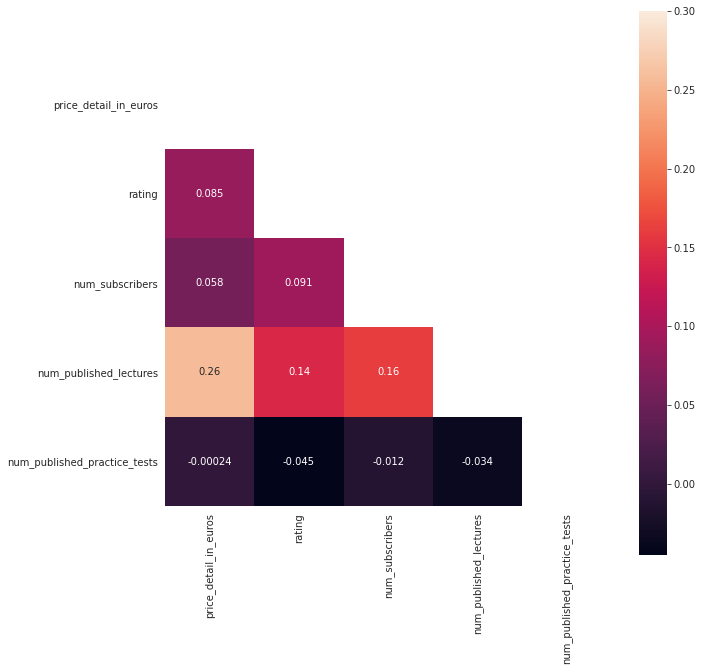

In [65]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(corr, mask=mask, annot=True, vmax=.3, square=True)

#### Observations

I noticed that price only correlates with with number of lectures published and it is nquite weak correlation. That seems to be about right because content focused primally on the subject and the content of lectures is what people pay money for. Also Numbeer of lectures have a weak correlation with rating and number of subscribers. 

### Which are the cheapest courses with highest rating?

In [68]:
df.sort_values(['price_detail_in_euros', 'rating'], ascending=(True, False)).head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros
4708,3056620,Curso de SKYPE aplicado a la teledocencia,/course/manejo-de-skype/,False,373,5.0,5.0,5.0,2,False,7,0,2020-04-27,2020-04-27,0.0,0.0,0.0,0.0
4716,3279440,Projektek kezelése 1. rész - MiniCRM alapozó,/course/projektek-kezelese-1-resz-minicrm-alap...,False,23,5.0,5.0,5.0,1,False,11,0,2020-06-28,2020-06-28,0.0,0.0,0.0,0.0
4718,3414420,パソコンに経費をかけたくない人の為のビジネス資料作成講座（リブレオフィスのCalc使用）,/course/libreoffice-calc-lesson-for-business/,False,27,5.0,5.0,5.0,1,False,22,0,2020-08-12,2020-08-12,0.0,0.0,0.0,0.0
20131,3375306,VIDEO MAKING & EDITING MASTERY in English,/course/video-making-editing-mastery-in-english/,False,444,5.0,5.0,5.0,3,False,7,0,2020-07-29,2020-07-29,0.0,0.0,0.0,0.0
20134,3474182,Discover 2Shapes for Rhino,/course/2shapes-for-rhino/,False,461,5.0,5.0,5.0,2,False,16,0,2020-09-04,2020-09-04,0.0,0.0,0.0,0.0


#### Observation

1. Simple sorting will not cut; Because we can see that courses with only few subscirbers and even fewer reviews has a better possibility to show up, but that just dont represents the truth.
    - I am going to need implement some additional metric. I am going to create a new column with trust score. It will be calculated like this: ***num_reviews / rating***

In [87]:
df['trust_score'] = df['num_reviews'] / df['rating']
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros,trust_score
0,793796,Microsoft Excel - Excel from Beginner to Advanced,/course/microsoft-excel-2013-from-beginner-to-...,True,555082,4.60192,4.60676,4.60676,172869,False,211,0,2016-03-15,2016-03-15,490.0,8640.0,5.61,98.86,37525.071851
1,516446,Microsoft Excel - Advanced Excel Formulas & Fu...,/course/excel-for-analysts/,True,181544,4.65408,4.65580,4.65580,38008,False,105,0,2015-05-31,2015-05-31,490.0,8640.0,5.61,98.86,8163.580910
2,1506888,Unlock Excel VBA and Excel Macros,/course/excel-vba-and-macros-course/,True,97189,4.63059,4.62752,4.62752,22737,False,172,0,2018-01-12,2018-01-12,490.0,8640.0,5.61,98.86,4913.430952
3,977438,Microsoft Excel - Data Analysis with Excel Piv...,/course/data-analysis-with-excel-pivot-tables/,True,112173,4.61015,4.59913,4.59913,21309,False,90,0,2016-10-06,2016-10-06,490.0,8640.0,5.61,98.86,4633.267596
4,948866,Excel Essentials: The Complete Excel Series - ...,/course/excel-essentials-the-complete-series-l...,True,72083,4.56456,4.54664,4.54664,18061,False,340,0,2016-09-03,2016-09-03,490.0,8640.0,5.61,98.86,3972.384002


In [88]:
df.sort_values(['price_detail_in_euros', 'trust_score'], ascending=(True, False)).head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros,trust_score
2674,53600,Useful Excel for Beginners,/course/useful-excel-for-beginners/,False,312295,4.46168,4.47932,4.47932,33570,False,89,0,2013-05-12,2013-05-12,0.0,0.0,0.0,0.0,7494.441121
28260,466000,SEO Tutorial for Beginners,/course/seo-tutorial/,False,225942,4.36138,4.38273,4.38273,24111,False,10,0,2015-04-02,2015-04-02,0.0,0.0,0.0,0.0,5501.365587
13529,192004,7 Scientifically Proven Steps to Increase Your...,/course/7-scientifically-proven-steps-to-incre...,False,255357,4.47738,4.50307,4.50307,21652,False,14,0,2014-03-31,2014-03-31,0.0,0.0,0.0,0.0,4808.275243
13530,797156,A Mini Course on Time Management,/course/manageyourtime/,False,172801,4.31576,4.32318,4.32318,19245,False,12,0,2016-03-18,2016-03-18,0.0,0.0,0.0,0.0,4451.584250
28261,11331,SEO Training Course by Moz,/course/whiteboard-seo/,False,253547,4.31713,4.31328,4.31328,16901,False,18,0,2011-11-23,2011-11-23,0.0,0.0,0.0,0.0,3918.363751


#### Observation

This calculation is biased on number of reviews and rating. If there is any recommendations how I should have dealt with it differently I would like to know.

### Which are the most expensive courses with highest rating?

In [89]:
df.sort_values(['price_detail_in_euros', 'trust_score'], ascending=(False, False)).head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros,trust_score
4812,1123940,Think Like a Leader with Brian Tracy,/course/think-like-a-leader-with-brian-tracy/,True,12431,4.50951,4.53525,4.53525,2397,False,62,0,2017-02-22,2017-02-22,0.0,12800.0,0.0,146.46,528.526542
28810,384494,دبلوم أخصائي التسويق الإلكتروني المعتمد,/course/engwaleed_aldhalee/,True,3244,4.00000,3.47700,3.47700,1531,False,31,0,2015-01-04,2015-01-04,0.0,12800.0,0.0,146.46,440.322117
4884,1713366,Freight Broker Training,/course/ervingslogistics/,True,4133,4.63810,4.63825,4.63825,1184,False,15,0,2018-05-25,2018-05-25,0.0,12800.0,0.0,146.46,255.268690
4946,1563516,The Soul of Leadership with Deepak Chopra,/course/the-soul-of-leadership-with-deepak-cho...,True,3857,4.75000,4.87076,4.87076,864,False,59,0,2018-02-20,2018-02-20,0.0,12800.0,0.0,146.46,177.385049
20339,1638294,Design de Interfaces do Zero ao Avançado: UI c...,/course/ui-design-de-interface/,True,1150,4.79167,4.74397,4.74397,490,False,441,0,2018-04-09,2018-04-09,0.0,12800.0,0.0,146.46,103.289017


### Which are the cheapest courses with lowest rating where is at least 1000 subscribers?

In [91]:
df[df.num_subscribers >= 1000].sort_values(['price_detail_in_euros', 'rating'], ascending=(True, True)).head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros,trust_score
20144,3582305,Adobe Xd Design Mode Complete Guide and Walkth...,/course/adobe-xd-design-mode-complete-guide-pa...,False,1521,0.00000,0.00000,0.00000,0,False,7,0,2020-10-20,2020-10-20,0.0,0.0,0.0,0.0,NaN
20147,3570173,Create Kinetic Typography with After Effects,/course/create-kinetic-typography-with-after-e...,False,1652,0.00000,0.00000,0.00000,0,False,12,0,2020-10-15,2020-10-15,0.0,0.0,0.0,0.0,NaN
28777,3119446,Content Marketing Blueprint Expert,/course/content-marketing-blueprint-expert/,False,1065,0.00000,0.00000,0.00000,0,False,10,0,2020-05-12,2020-05-12,0.0,0.0,0.0,0.0,NaN
28765,2651412,The Migration - Building a Membership Website,/course/building-a-membership-website/,False,4428,1.50000,1.72000,1.72000,2,False,6,0,2019-11-11,2019-11-11,0.0,0.0,0.0,0.0,1.162791
32306,3277334,Start Blog and Earn Money Online in 2020,/course/start-blog-and-earn-money-online-in-2020/,False,1609,2.66667,2.51925,2.51925,9,False,6,0,2020-06-28,2020-06-28,0.0,0.0,0.0,0.0,3.572492


#### Observation

All courses are free and have very few reviews with few lectures that were published in second half of 2020. It is hard to say more about quality of course without knowing watch time. The results migh be like this because people only subscribed but never started watching it or watched for a bit and decided it was not worth their time.

### Which are the most expensive courses with lowest rating where is at least 1000 subscribers?

In [92]:
df[df.num_subscribers >= 1000].sort_values(['price_detail_in_euros', 'rating'], ascending=(False, True)).head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros,trust_score
7173,2061495,The Ultimate Guide To Becoming an All-Star on ...,/course/how-to-become-an-all-star-on-linkedin/,True,6217,3.00,2.36806,2.36806,28,False,125,0,2018-12-01,2018-12-01,0.0,12800.0,0.00,146.46,11.824025
25642,1984640,Facebook ads for Shopify ( done for you tactics),/course/facebook-ads-for-shopify-done-for-you-...,True,3816,3.10,2.75731,2.75731,17,False,7,0,2018-10-23,2018-10-23,0.0,12800.0,0.00,146.46,6.165429
28810,384494,دبلوم أخصائي التسويق الإلكتروني المعتمد,/course/engwaleed_aldhalee/,True,3244,4.00,3.47700,3.47700,1531,False,31,0,2015-01-04,2015-01-04,0.0,12800.0,0.00,146.46,440.322117
582,2401434,Excel 365 A to Almost Z,/course/excel-365-a-to-almost-z/,True,10183,4.00,3.70876,3.70876,143,False,89,0,2019-06-06,2019-06-06,0.0,12800.0,0.00,146.46,38.557361
5831,1719944,Cognitive Behavioral Therapy CBT for depressio...,/course/cognitive-behavioral-therapy-cbt-for-d...,True,1757,3.95,3.85037,3.85037,89,False,11,0,2018-05-29,2018-05-29,735.0,12800.0,8.41,146.46,23.114662


### Highest rated courses with the highest subscriber count

In [94]:
df.sort_values(['rating', 'num_subscribers'], ascending=(False,False)).head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros,trust_score
14907,1184318,After Effects CC: Animating Text Titles For Be...,/course/aftereffects-lower-thirds-titles/,True,12768,5.0,5.0,5.0,101,False,16,0,2017-04-18,2017-04-18,490.0,4800.0,5.61,54.92,20.2
13877,381524,UI Design with Photoshop from Beginner to Expe...,/course/learn-photoshop-for-ui-design-from-scr...,True,8219,5.0,5.0,5.0,960,False,126,0,2014-12-31,2014-12-31,490.0,8640.0,5.61,98.86,192.0
13506,3581955,Gain Love Relationship Skills Life Coaching Co...,/course/get-a-relationship-life-coaching-love-...,True,3884,5.0,5.0,5.0,1,False,29,0,2020-10-20,2020-10-20,490.0,8640.0,5.61,98.86,0.2
26993,3150376,Space Render 2.0: Transform your podcast into ...,/course/space-render-20-transform-your-podcast...,True,3738,5.0,5.0,5.0,3,False,7,0,2020-05-20,2020-05-20,490.0,1280.0,5.61,14.65,0.6
27416,3278788,UDEMY: Make Money Online. Unofficial,/course/start-selling-on-udemy-in-2-hours/,True,3251,5.0,5.0,5.0,1,False,42,0,2020-06-28,2020-06-28,490.0,1280.0,5.61,14.65,0.2


### Lowest rated courses with the highest subscriber count

In [95]:
df.sort_values(['rating', 'num_subscribers'], ascending=(True,False)).head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros,trust_score
19433,2744606,Motion Graphics: Make Liquid Motion Effects in...,/course/motion-graphics-liquid-motion-effects-...,True,6389,0.0,0.0,0.0,0,False,9,0,2020-01-07,2020-01-07,490.0,1280.0,5.61,14.65,NaN
13487,3235993,Learn How to Build a Ladybug Mobile Robot from...,/course/learn-how-to-build-a-ladybug-mobile-ro...,True,4509,0.0,0.0,0.0,0,False,25,0,2020-06-14,2020-06-14,490.0,1280.0,5.61,14.65,NaN
19549,3576289,Learn Photoshop - Essential Training Course,/course/master-your-skills-in-photoshop/,True,3629,0.0,0.0,0.0,0,False,5,0,2020-10-18,2020-10-18,490.0,1600.0,5.61,18.31,NaN
2500,2922370,QuickBooks Online vs Aplos vs Xero Not for Pro...,/course/quickbooks-online-vs-aplos-vs-xero-not...,True,3510,0.0,0.0,0.0,0,False,89,0,2020-03-28,2020-03-28,490.0,8640.0,5.61,98.86,NaN
2468,2689194,Google Script - Gmail Inbox images move to Gdr...,/course/google-apps-script-gmail/,True,3107,0.0,0.0,0.0,0,False,19,0,2019-12-04,2019-12-04,490.0,8640.0,5.61,98.86,NaN


### Most expensive courses with the highest subscriber count

In [96]:
df.sort_values(['price_detail_in_euros', 'num_subscribers'], ascending=(False,False)).head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros,trust_score
4812,1123940,Think Like a Leader with Brian Tracy,/course/think-like-a-leader-with-brian-tracy/,True,12431,4.50951,4.53525,4.53525,2397,False,62,0,2017-02-22,2017-02-22,0.0,12800.0,0.0,146.46,528.526542
582,2401434,Excel 365 A to Almost Z,/course/excel-365-a-to-almost-z/,True,10183,4.00000,3.70876,3.70876,143,False,89,0,2019-06-06,2019-06-06,0.0,12800.0,0.0,146.46,38.557361
15852,2312850,WordPress Beginners - Make your own Awesome We...,/course/wordpress-for-beginners-create-your-ow...,True,7975,4.55000,4.35913,4.35913,38,False,65,0,2019-04-08,2019-04-08,0.0,12800.0,0.0,146.46,8.717336
7173,2061495,The Ultimate Guide To Becoming an All-Star on ...,/course/how-to-become-an-all-star-on-linkedin/,True,6217,3.00000,2.36806,2.36806,28,False,125,0,2018-12-01,2018-12-01,0.0,12800.0,0.0,146.46,11.824025
24666,1778676,Google Adwords PPC Success in 2019: Google Pay...,/course/succeed-profit-with-google-adwords-goo...,True,5694,4.25000,4.21317,4.21317,45,False,62,0,2018-07-02,2018-07-02,0.0,12800.0,0.0,146.46,10.680794


### The cheapest courses with the highest subscriber count

In [97]:
df.sort_values(['price_detail_in_euros', 'num_subscribers'], ascending=(True,False)).head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros,trust_score
2674,53600,Useful Excel for Beginners,/course/useful-excel-for-beginners/,False,312295,4.46168,4.47932,4.47932,33570,False,89,0,2013-05-12,2013-05-12,0.0,0.0,0.0,0.0,7494.441121
13529,192004,7 Scientifically Proven Steps to Increase Your...,/course/7-scientifically-proven-steps-to-incre...,False,255357,4.47738,4.50307,4.50307,21652,False,14,0,2014-03-31,2014-03-31,0.0,0.0,0.0,0.0,4808.275243
28261,11331,SEO Training Course by Moz,/course/whiteboard-seo/,False,253547,4.31713,4.31328,4.31328,16901,False,18,0,2011-11-23,2011-11-23,0.0,0.0,0.0,0.0,3918.363751
28260,466000,SEO Tutorial for Beginners,/course/seo-tutorial/,False,225942,4.36138,4.38273,4.38273,24111,False,10,0,2015-04-02,2015-04-02,0.0,0.0,0.0,0.0,5501.365587
19665,399938,Professional Logo Design in Adobe Illustrator,/course/professional-logo-design-crash-course/,False,221835,4.36025,4.33562,4.33562,8309,False,45,0,2015-01-21,2015-01-21,0.0,0.0,0.0,0.0,1916.450242


## Courses with most subscribers

In [98]:
df.sort_values('num_subscribers', ascending=False).head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price_in_rupees,price_detail_in_rupees,discount_price_in_euros,price_detail_in_euros,trust_score
0,793796,Microsoft Excel - Excel from Beginner to Advanced,/course/microsoft-excel-2013-from-beginner-to-...,True,555082,4.60192,4.60676,4.60676,172869,False,211,0,2016-03-15,2016-03-15,490.0,8640.0,5.61,98.86,37525.071851
23264,914296,The Complete Digital Marketing Course - 12 Cou...,/course/learn-digital-marketing-course/,True,503553,4.45281,4.45310,4.45310,119137,False,252,0,2016-07-25,2016-07-25,490.0,8640.0,5.61,98.86,26753.722126
13683,927356,Adobe Photoshop CC: Your Complete Beginner to ...,/course/adobe-photoshop-course/,True,471683,4.52312,4.52031,4.52031,16371,False,163,0,2016-08-09,2016-08-09,490.0,6400.0,5.61,73.23,3621.654267
13674,874012,The Ultimate Drawing Course - Beginner to Adva...,/course/the-ultimate-drawing-course-beginner-t...,True,407236,4.54529,4.54246,4.54246,99957,False,63,0,2016-06-10,2016-06-10,490.0,8640.0,5.61,98.86,22005.036918
13694,927360,After Effects CC Masterclass: Complete After E...,/course/after-effects-cc/,True,324184,4.59212,4.58142,4.58142,8973,False,214,0,2016-08-09,2016-08-09,490.0,6400.0,5.61,73.23,1958.563066
